In [ ]:
from NeuralNet import NeuralNet
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd  
from sklearn.preprocessing import MinMaxScaler

### 1. Load the data

In [2]:
#load the data
df_train= pd.read_csv("Data/ParisHousing_train_data.csv")
df_test= pd.read_csv("Data/ParisHousing_test_data.csv")
#df_val= pd.read_csv("Data/ParisHousing_val_data.csv")


#split
df_train_x =df_train.drop(columns=['price'])  
df_train_y=df_train['price'] 

df_test_x= df_test.drop(columns=['price'])  
df_test_y = df_test['price'] 


#df_val_x= df_val.drop(columns=['price'])  
#df_val_y= df_val['price'] 

### 2. Preprocesing

In [3]:
y_train = df_train_y.values.reshape(-1, 1)
y_test = df_test_y.values.reshape(-1, 1)

scaler_y = MinMaxScaler()
y = scaler_y.fit_transform(y_train.reshape(-1, 1))

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(df_train_x)
X_test_scaled = scaler.transform(df_test_x)

In [4]:
y

array([[0.05795507],
       [0.05513524],
       [0.65377765],
       ...,
       [0.39620874],
       [0.4496425 ],
       [0.10744468]])

### 3. Training

In [ ]:
# Definir la arquitectura de la red neuronal
layers = [X_train_scaled.shape[1], 64,32, 1]  # Ejemplo: entrada -> 2 capas ocultas -> salida
activation = "relu"  # Activación en capas ocultas
learning_rate = 0.01
momentum = 0.9
validation_split = 0.2  # 20% para validación

# Inicializar la red neuronal
nn = NeuralNet(layers, activation=activation, lr=learning_rate, momentum=momentum, validation_split=validation_split)

# Entrenar el modelo
epochs = 200
nn.fit(X_train_scaled, y, epochs=epochs)

# Obtener la evolución del error
losses = nn.loss_epochs()


Predicciones iniciales (antes del entrenamiento):
Entrada: [-1.16029499 -0.24668542  0.98511083  0.99352099  0.36895395  1.2433589
 -0.17387851  0.52465283 -0.70949992  1.00425907 -1.00175153 -0.55376963
 -0.39842943 -1.55291841 -1.00828431 -0.94555365], Predicción inicial: [0.00044336], Real: [0.16626922]
Entrada: [ 1.240652   -1.67571029  0.98511083  0.99352099 -1.1540222   1.11700019
  1.2188905  -1.23563177 -1.03240352 -0.99575899 -1.00175153  0.19246103
  0.82313305 -0.52286825  0.99178375  0.63332951], Predicción inicial: [0.0003501], Real: [0.85369147]
Entrada: [-0.77372492  0.31098282  0.98511083  0.99352099  0.0574361   0.11776561
 -1.56664751  1.22876667  1.65845977  1.00425907  0.99825153  1.19680215
  1.59716855  1.27781204  0.99178375 -0.94555365], Predicción inicial: [0.00041031], Real: [0.2771739]
Entrada: [-0.34485464  1.35661078  0.98511083  0.99352099 -0.73866507 -1.04526089
 -0.52207076 -1.23563177  0.0439418  -0.99575899 -1.00175153  0.81171799
 -0.11191562  0.98405

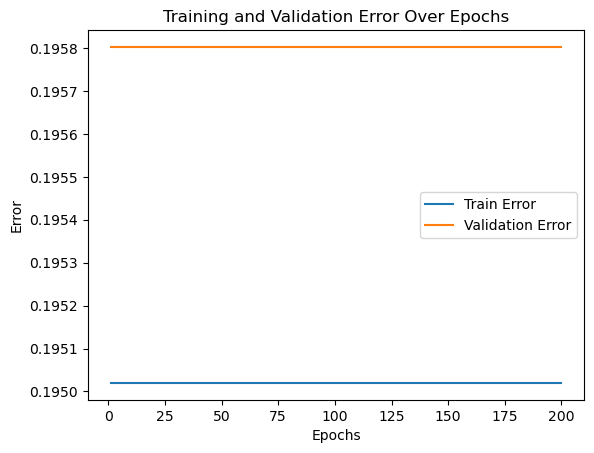

In [6]:
# Graficar la evolución de los errores
import matplotlib.pyplot as plt
plt.plot(range(1, epochs + 1), losses[:, 0], label="Train Error")
if validation_split > 0:
    plt.plot(range(1, epochs + 1), losses[:, 1], label="Validation Error")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.legend()
plt.title("Training and Validation Error Over Epochs")
plt.show()



In [7]:
# Realizar predicciones en los datos de prueba
y_pred = nn.predict(X_test_scaled).flatten()

# Comparar las predicciones con los valores reales
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Data: {mse}")

mae_test = mean_absolute_error(y_test, y_pred)
mape_test = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("MAE (Mean Absolute Error):", mae_test)
print("MAPE (Mean Absolute Percentage Error):", mape_test, "%")

Mean Squared Error on Test Data: 33508773181675.465
MAE (Mean Absolute Error): 4989854.290883442
MAPE (Mean Absolute Percentage Error): 100.00000462951428 %


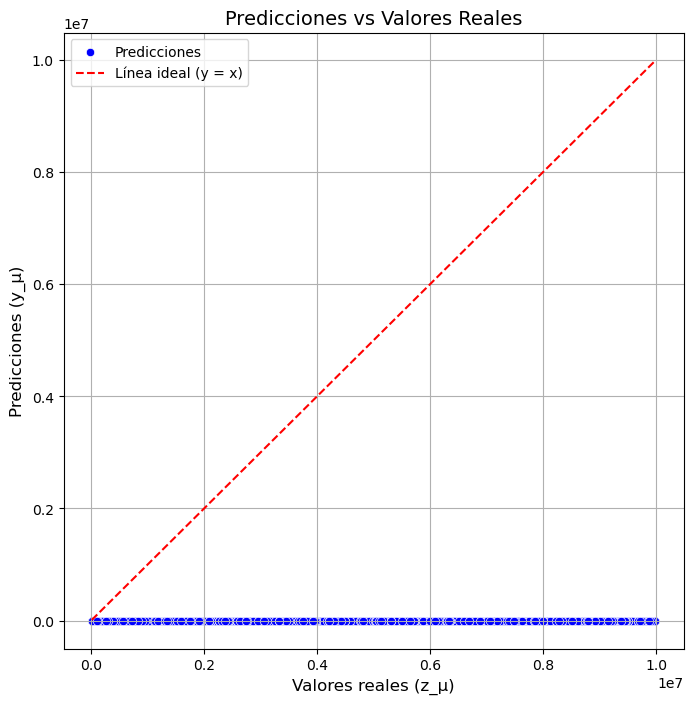

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Crear el gráfico de dispersión
y_test = np.array(y_test).flatten()  
y_pred = np.array(y_pred).flatten() 

plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Predicciones')

# Agregar la línea ideal (y = x)
min_value = min(min(y_test), min(y_test))
max_value = max(max(y_test), max(y_test))
plt.plot([min_value, max_value], [min_value, max_value], color='red', linestyle='--', label='Línea ideal (y = x)')

# Configurar etiquetas y título
plt.title("Predicciones vs Valores Reales", fontsize=14)
plt.xlabel("Valores reales (z_μ)", fontsize=12)
plt.ylabel("Predicciones (y_μ)", fontsize=12)
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

In [9]:
y_pred


array([-0.05682899, -0.05673007, -0.05682894, ..., -0.05683656,
       -0.05686727, -0.05682588])

In [10]:
y_test

array([3282188.1, 7704215.5, 9385146.9, ..., 9877813.4, 3329395.8,
       4204881. ])

In [11]:
# Cross validation
# Realizar cross-validation
results = nn.cross_validate(X_train_scaled, y_train, k=5, epochs=100)

# Visualizar resultados
print("Cross-validation metrics:")
print(results)


=== Fold 1/5 ===
Predicciones iniciales (antes del entrenamiento):
Entrada: [-0.4681924   0.48525415 -1.01511421  0.99352099  0.0920492   0.52606804
 -0.87026301  0.52465283  0.47447992 -0.99575899  0.99825153  1.37407963
 -0.52082702 -0.61824326 -1.00828431  0.31755288], Predicción inicial: [0.00136251], Real: [3653259.]
Entrada: [ 0.48361458 -0.69979087  0.98511083  0.99352099 -1.18863529 -0.28271082
  1.56708275 -0.53151793  0.68974899  1.00425907  0.99825153 -1.67537061
  1.42167453  0.35458189 -1.00828431 -0.31400039], Predicción inicial: [0.00125394], Real: [6378709.2]
Entrada: [-1.63824188 -1.64085603  0.98511083  0.99352099 -0.73866507 -0.13612918
 -0.87026301  0.52465283  0.58211446  1.00425907  0.99825153 -1.19349502
  0.56764962 -1.71696343 -1.00828431  0.00177624], Predicción inicial: [0.00134089], Real: [307536.1]
Entrada: [-0.38107703 -0.6649366   0.98511083  0.99352099 -0.08101627  1.45653079
  0.87069825 -0.53151793  1.44319071  1.00425907  0.99825153  0.37979927
 -1.2

KeyboardInterrupt: 